# Practice notebook for confidence intervals using NHANES data

This notebook will give you the opportunity to practice working with confidence intervals using the NHANES data.

You can enter your code into the cells that say "enter your code here", and you can type responses to the questions into the cells that say "Type Markdown and Latex".

Note that most of the code that you will need to write below is very similar to code that appears in the case study notebook.  You will need to edit code from that notebook in small ways to adapt it to the prompts below.

To get started, we will use the same module imports and read the data in the same way as we did in the case study:

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.proportion import proportion_confint

da = pd.read_csv("nhanes_2015_2016.csv")

## Question 1

Restrict the sample to women between 35 and 50, then use the marital status variable [DMDMARTL](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#DMDMARTL) to partition this sample into two groups - women who are currently married, and women who are not currently married.  Within each of these groups, calculate the proportion of women who have completed college.  Calculate 95% confidence intervals for each of these proportions.

In [2]:
# enter your code here
da_female_35_50=da[(da['RIAGENDR']==2)&(da['RIDAGEYR']>=35)&(da['RIDAGEYR']<=50)]
da_female_35_50.reset_index(inplace=True, drop=True)

In [3]:
da_female_35_50_married=da_female_35_50[da_female_35_50['DMDMARTL']==1]
da_female_35_50_not_married=da_female_35_50[da_female_35_50['DMDMARTL'].isin([2,3,4,5,6])]
da_female_35_50_married.reset_index(inplace=True, drop=True)
da_female_35_50_not_married.reset_index(inplace=True, drop=True)

In [4]:
proportion_married=sum(da_female_35_50_married['DMDEDUC2']==5)/len(da_female_35_50_married)

In [5]:
proportion_married

0.36080178173719374

In [6]:
se_married=proportion_married*(1-proportion_married)
se_married

0.23062385603246013

In [7]:
n_married=len(da_female_35_50_married['DMDEDUC2'])
n_married

449

In [8]:
print('Lower Boundary: ', proportion_married-1.96*np.sqrt((se_married/n_married)))
print('Upper Boundary: ', proportion_married+1.96*np.sqrt((se_married/n_married)))

Lower Boundary:  0.3163811208674688
Upper Boundary:  0.4052224426069187


In [11]:
ci_low, ci_upp = proportion_confint(162, 449, alpha=0.05, method='normal')
ci_low, ci_upp

(0.31638193710753626, 0.4052216263668512)

In [12]:
ci_upp-ci_low

0.08883968925931496

In [13]:
proportion_not_married=sum(da_female_35_50_not_married['DMDEDUC2']==5)/len(da_female_35_50_not_married)
proportion_not_married

0.21301775147928995

In [14]:
se_not_married=proportion_not_married*(1-proportion_not_married)
se_not_married

0.1676411890339974

In [15]:
n_not_married=len(da_female_35_50_not_married['DMDEDUC2'])
n_not_married

338

In [16]:
print('Lower Boundary: ', proportion_not_married-1.96*np.sqrt((se_not_married/n_not_married)))
print('Upper Boundary: ', proportion_not_married+1.96*np.sqrt((se_not_married/n_not_married)))

Lower Boundary:  0.1693673655848136
Upper Boundary:  0.25666813737376626


In [17]:
ci_low, ci_upp = proportion_confint(72, 338, alpha=0.05, method='normal')
ci_low, ci_upp

(0.16936816767089768, 0.2566673352876822)

In [18]:
ci_upp-ci_low

0.08729916761678452

__Q1a.__ Identify which of the two confidence intervals is wider, and explain why this is the case. 

__Q1b.__ Write 1-2 sentences summarizing these findings for an audience that does not know what a confidence interval is (the goal here is to report the substance of what you learned about how marital status and educational attainment are related, not to teach a person what a confidence interval is).

## Question 2

Construct a 95% confidence interval for the proportion of smokers who are female. Construct a 95% confidence interval for the proportion of smokers who are male. Construct a 95% confidence interval for the **difference** between those two gender proportions.

In [19]:
# enter your code here
da_smokers=da[da['SMQ020']==1]
da_smokers.reset_index(inplace=True, drop=True)
smokers_gender=da_smokers['RIAGENDR']
smokers_gender=smokers_gender[~smokers_gender.isna()]
smokers_gender.reset_index(inplace=True, drop=True)
n_smokers=len(smokers_gender)
n_smokers

2319

In [21]:
n_smokers_gender_male=sum(smokers_gender==1)
n_smokers_gender_male

1413

In [22]:
n_smokers_gender_female=sum(smokers_gender==2)
n_smokers_gender_female

906

In [23]:
proportion_smokers_gender_male=(n_smokers_gender_male/n_smokers)
proportion_smokers_gender_male

0.6093143596377749

In [24]:
proportion_smokers_gender_female=(n_smokers_gender_female/n_smokers)
proportion_smokers_gender_female

0.3906856403622251

In [25]:
se_smokers_gender_male=np.sqrt((proportion_smokers_gender_male*(1-proportion_smokers_gender_male))/n_smokers_gender_male)
se_smokers_gender_male

0.012979661011895138

In [26]:
se_smokers_gender_female=np.sqrt((proportion_smokers_gender_female*(1-proportion_smokers_gender_female))/n_smokers_gender_female)
se_smokers_gender_female

0.016209526631489866

In [27]:
print('Lower Boundary Male: ', proportion_smokers_gender_male-1.96*se_smokers_gender_male)
print('Upper Boundary Male: ', proportion_smokers_gender_male+1.96*se_smokers_gender_male)

Lower Boundary Male:  0.5838742240544604
Upper Boundary Male:  0.6347544952210894


In [28]:
ci_low, ci_upp = proportion_confint(n_smokers_gender_male, n_smokers, alpha=0.05, method='normal')
ci_low, ci_upp

(0.5894565132052486, 0.6291722060703012)

In [30]:
0.6347544952210894-0.5838742240544604

0.050880271166628965

In [31]:
ci_low, ci_upp = proportion_confint(n_smokers_gender_female, n_smokers, alpha=0.05, method='normal')
ci_low, ci_upp

(0.37082779392969883, 0.41054348679475133)

In [32]:
print('Lower Boundary Female: ', proportion_smokers_gender_female-1.96*se_smokers_gender_female)
print('Upper Boundary Female: ', proportion_smokers_gender_female+1.96*se_smokers_gender_female)

Lower Boundary Female:  0.35891496816450497
Upper Boundary Female:  0.4224563125599452


In [33]:
0.4224563125599452-0.35891496816450497

0.06354134439544024

In [34]:
proportion_smokers_gender_diff=proportion_smokers_gender_male-proportion_smokers_gender_female
proportion_smokers_gender_diff

0.21862871927554983

In [35]:
se_proportion_smokers_diff=np.sqrt((se_smokers_gender_male**2)+(se_smokers_gender_female**2))

In [36]:
print('Lower Boundary Gender Difference: ', proportion_smokers_gender_diff-1.96*se_proportion_smokers_diff)
print('Upper Boundary Gender Difference: ', proportion_smokers_gender_diff+1.96*se_proportion_smokers_diff)

Lower Boundary Gender Difference:  0.17792766142206878
Upper Boundary Gender Difference:  0.2593297771290309


In [37]:
0.2593297771290309-0.17792766142206878

0.0814021157069621

__Q2a.__ Why might it be relevant to report the separate gender proportions **and** the difference between the gender proportions?

__Q2b.__ How does the **width** of the confidence interval for the difference between the gender proportions compare to the widths of the confidence intervals for the separate gender proportions?

## Question 3

Construct a 95% interval for height ([BMXHT](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.htm#BMXHT)) in centimeters.  Then convert height from centimeters to inches by dividing by 2.54, and construct a 95% confidence interval for height in inches.  Finally, convert the endpoints (the lower and upper confidence limits) of the confidence interval from inches to back to centimeters   

In [38]:
# enter your code here
height_values_cm=da['BMXHT']
height_values_cm=height_values_cm[~height_values_cm.isna()]
height_values_cm.reset_index(inplace=True, drop=True)
np.mean(height_values_cm)

166.1428344791116

In [39]:
height_values_inches=height_values_cm/2.54
height_values_inches=height_values_inches[~height_values_inches.isna()]
height_values_inches.reset_index(inplace=True, drop=True)
np.mean(height_values_inches)

65.41056475555574

In [40]:
n_height_values_inches=len(height_values_inches)
n_height_values_inches

5673

In [41]:
std_height_values_inches=np.std(height_values_inches)
std_height_values_inches

3.9678642989700483

In [42]:
print('Lower Boundary Inches: ', np.mean(height_values_inches)-1.96*(std_height_values_inches/np.sqrt(n_height_values_inches)))
print('Upper Boundary Inches: ', np.mean(height_values_inches)+1.96*(std_height_values_inches/np.sqrt(n_height_values_inches)))

Lower Boundary Inches:  65.30731084935782
Upper Boundary Inches:  65.51381866175366


In [43]:
sm.stats.DescrStatsW(height_values_inches).tconfint_mean()

(65.30728160535489, 65.51384790575659)

In [44]:
print('Lower Boundary cm: ', (np.mean(height_values_inches)-1.96*(std_height_values_inches/np.sqrt(n_height_values_inches)))*2.54)
print('Upper Boundary cm: ', (np.mean(height_values_inches)+1.96*(std_height_values_inches/np.sqrt(n_height_values_inches)))*2.54)

Lower Boundary cm:  165.88056955736886
Upper Boundary cm:  166.4050994008543


__Q3a.__ Describe how the confidence interval constructed in centimeters relates to the confidence interval constructed in inches.

## Question 4

Partition the sample based on 10-year age bands, i.e. the resulting groups will consist of people with ages from 18-28, 29-38, etc. Construct 95% confidence intervals for the difference between the mean BMI for females and for males within each age band.

In [45]:
# enter your code here
for val in [[18, 28], [29, 38], [39, 48], [49, 58], [59, 68], [69, 78], [79, 88]]:
    da_year_band=da[(da['RIDAGEYR']>=val[0])&(da['RIDAGEYR']<=val[1])]
    da_year_band.reset_index(inplace=True, drop=True)
    
    bmi_males=da_year_band[da_year_band['RIAGENDR']==1]['BMXBMI']
    bmi_females=da_year_band[da_year_band['RIAGENDR']==2]['BMXBMI']
    
    bmi_males=bmi_males[~bmi_males.isna()]
    bmi_males.reset_index(inplace=True, drop=True)
    bmi_females=bmi_females[~bmi_females.isna()]
    bmi_females.reset_index(inplace=True, drop=True)
    
    print("Std Males: ", np.std(bmi_males))
    print("Std Females: ", np.std(bmi_females))
    print("Variance Ratio: ", (np.std(bmi_males)**2)/(np.std(bmi_females)**2))
    print("_________________________________________________________")

Std Males:  6.772851485163334
Std Females:  7.953905067202027
Variance Ratio:  0.7250739437466444
_________________________________________________________
Std Males:  6.719390520544581
Std Females:  7.950938058946232
Variance Ratio:  0.7142052271687328
_________________________________________________________
Std Males:  6.097237131077363
Std Females:  8.036735756888811
Variance Ratio:  0.5755814554627979
_________________________________________________________
Std Males:  6.144153177450539
Std Females:  7.639107277699185
Variance Ratio:  0.6469025317696486
_________________________________________________________
Std Males:  5.952529408367408
Std Females:  7.771060178439661
Variance Ratio:  0.5867357560253481
_________________________________________________________
Std Males:  5.327630164547575
Std Females:  6.768248515453769
Variance Ratio:  0.6196059006913647
_________________________________________________________
Std Males:  4.682137173170974
Std Females:  5.469915424161031
Va

In [46]:
for val in [[18, 28], [29, 38], [39, 48], [49, 58], [59, 68], [69, 78], [79, 88]]:
    da_year_band=da[(da['RIDAGEYR']>=val[0])&(da['RIDAGEYR']<=val[1])]
    da_year_band.reset_index(inplace=True, drop=True)
    
    bmi_males=da_year_band[da_year_band['RIAGENDR']==1]['BMXBMI']
    bmi_females=da_year_band[da_year_band['RIAGENDR']==2]['BMXBMI']
    
    bmi_males=bmi_males[~bmi_males.isna()]
    bmi_males.reset_index(inplace=True, drop=True)
    bmi_females=bmi_females[~bmi_females.isna()]
    bmi_females.reset_index(inplace=True, drop=True)
    
    bmi_males_temp=sm.stats.DescrStatsW(bmi_males)
    bmi_females_temp=sm.stats.DescrStatsW(bmi_females)
    
    cm = sm.stats.CompareMeans(bmi_males_temp, bmi_females_temp)
    lower, upper=cm.tconfint_diff(usevar='pooled')
    print(val)
    print("pooled: ", lower, ",", upper)
    print("pooled diff: ", abs(upper)-abs(lower))
    print('---------------------------------------------------------------------------------------')

[18, 28]
pooled:  -1.741339639227411 , 0.034817164017523994
pooled diff:  -1.706522475209887
---------------------------------------------------------------------------------------
[29, 38]
pooled:  -1.1877114002496385 , 0.6951862411159043
pooled diff:  -0.4925251591337342
---------------------------------------------------------------------------------------
[39, 48]
pooled:  -2.4438533490140424 , -0.5343193405535154
pooled diff:  -1.909534008460527
---------------------------------------------------------------------------------------
[49, 58]
pooled:  -2.3314902075137223 , -0.4729688416549196
pooled diff:  -1.8585213658588027
---------------------------------------------------------------------------------------
[59, 68]
pooled:  -2.7191581021392035 , -0.9252456993910773
pooled diff:  -1.7939124027481261
---------------------------------------------------------------------------------------
[69, 78]
pooled:  -2.8169097637577014 , -0.8181860593381438
pooled diff:  -1.9987237044195576

__Q4a.__ How do the widths of these confidence intervals differ?  Provide an explanation for any substantial diferences in the confidence interval widths that you see.

## Question 5

Construct a 95% confidence interval for the first and second systolic blood pressure measures, and for the difference between the first and second systolic blood pressure measurements within a subject.

In [47]:
# enter code here
first_sbp=da['BPXSY1']
second_sbp=da['BPXSY2']
sbp_diff=first_sbp-second_sbp

first_sbp=first_sbp[~first_sbp.isna()]
first_sbp.reset_index(inplace=True, drop=True)
second_sbp=second_sbp[~second_sbp.isna()]
second_sbp.reset_index(inplace=True, drop=True)
sbp_diff=sbp_diff[~sbp_diff.isna()]
sbp_diff.reset_index(inplace=True, drop=True)

In [48]:
lower, upper=sm.stats.DescrStatsW(first_sbp).tconfint_mean()
print(lower, ",", upper)
print(abs(upper)-abs(lower))

124.59163222328895 , 125.57759569746646
0.9859634741775096


In [49]:
lower, upper=sm.stats.DescrStatsW(second_sbp).tconfint_mean()
print(lower, ",", upper)
print(abs(upper)-abs(lower))

124.29482629577244 , 125.27120803123749
0.9763817354650541


In [50]:
lower, upper=sm.stats.DescrStatsW(sbp_diff).tconfint_mean()
print(lower, ",", upper)
print(abs(upper)-abs(lower))

0.5399696008802797 , 0.8100024609561889
0.2700328600759092


__Q5a.__ Based on these confidence intervals, would you say that a difference of zero between the population mean values of the first and second systolic blood pressure measures is consistent with the data?

__Q5b.__ Discuss how the width of the confidence interval for the within-subject difference compares to the widths of the confidence intervals for the first and second measures.

## Question 6

Construct a 95% confidence interval for the mean difference between the average age of a smoker, and the average age of a non-smoker.

In [51]:
# insert your code here
smokers_age=da[da['SMQ020']==1]['RIDAGEYR']
smokers_age=smokers_age[~smokers_age.isna()]
smokers_age.reset_index(inplace=True, drop=True)
non_smokers_age=da[da['SMQ020']!=1]['RIDAGEYR']
non_smokers_age=non_smokers_age[~non_smokers_age.isna()]
non_smokers_age.reset_index(inplace=True, drop=True)

smokers_age_temp=sm.stats.DescrStatsW(smokers_age)
non_smokers_age_temp=sm.stats.DescrStatsW(non_smokers_age)

cm = sm.stats.CompareMeans(smokers_age_temp, non_smokers_age_temp)
lower, upper=cm.tconfint_diff(usevar='pooled')
print("pooled: ", lower, ",", upper)

pooled:  5.833562476381499 , 7.746041103858306


__Q6a.__ Use graphical and numerical techniques to compare the variation in the ages of smokers to the variation in the ages of non-smokers.  

In [52]:
# insert your code here
smokers_age.describe()

count    2319.000000
mean       52.096593
std        17.461141
min        18.000000
25%        37.000000
50%        54.000000
75%        66.000000
max        80.000000
Name: RIDAGEYR, dtype: float64

In [53]:
non_smokers_age.describe()

count    3416.000000
mean       45.306792
std        18.568337
min        18.000000
25%        29.000000
50%        44.000000
75%        60.000000
max        80.000000
Name: RIDAGEYR, dtype: float64

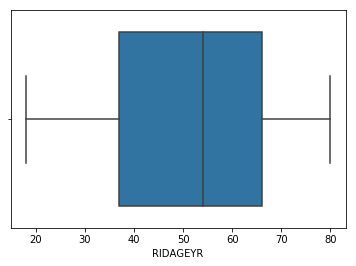

In [54]:
sns.boxplot(smokers_age)

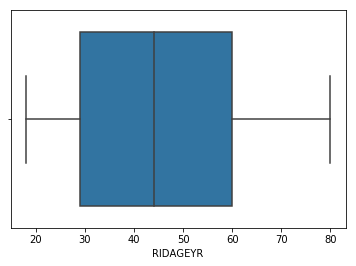

In [55]:
sns.boxplot(non_smokers_age)

__Q6b.__ Does it appear that uncertainty about the mean age of smokers, or uncertainty about the mean age of non-smokers contributed more to the uncertainty for the mean difference that we are focusing on here?